In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255

In [4]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [5]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

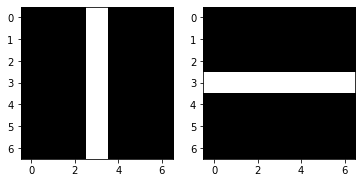

In [6]:
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(filters[:, :, :, 0])
plt.subplot(1, 2, 2)
plt.imshow(filters[:, :, :, 1])
plt.show()

In [7]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

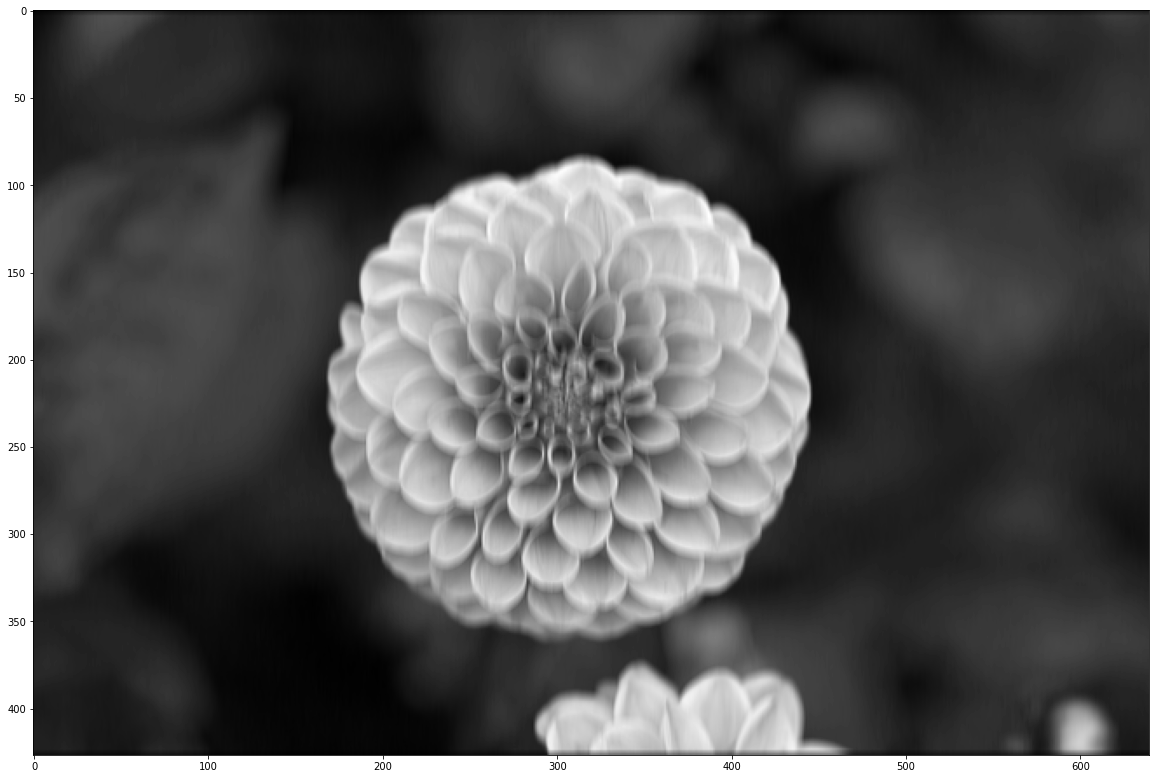

In [8]:
plt.figure(figsize=(20, 15))
plt.imshow(outputs[1, :, :, 0], cmap='gray')
plt.show()

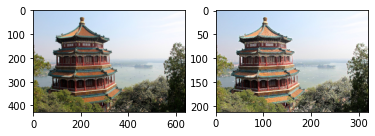

In [9]:
# pool_outputs = tf.nn.avg_pool2d(images, ksize=2, strides=2, padding='VALID')
pool_outputs = tf.nn.max_pool2d(images, ksize=2, strides=2, padding='VALID')
plt.subplot(1, 2, 1)
plt.imshow(images[0, :, :, :])
plt.subplot(1, 2, 2)
plt.imshow(pool_outputs[0, :, :, :])
plt.show()

In [17]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, 7, activation="relu", padding="same", 
                                                           input_shape=[28, 28, 1]),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(.5),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dropout(.5),
                                    tf.keras.layers.Dense(10, activation="softmax")

])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)        

In [31]:
lenet = tf.keras.models.Sequential([
                            tf.keras.layers.InputLayer([32, 32, 3]),
                            tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=1, 
                                                   activation='tanh'),
                            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                            tf.keras.layers.Activation('tanh'),

                            tf.keras.layers.Conv2D(filters=10, kernel_size=5, strides=1, 
                                                   activation='tanh'),
                            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                            tf.keras.layers.Activation('tanh'),

                            tf.keras.layers.Conv2D(filters=120, kernel_size=5, strides=1, 
                                                   activation='tanh'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(84, activation='tanh'),
                            tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
lenet.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 10)        1510      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 120)        